### Data Exploration


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
# Load the Titanic dataset
df = pd.read_csv('train.csv')

# Preview the first few rows of the dataset
print(df.head())



   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [84]:
# Check the number of rows and columns in the dataset
print(df.shape)



(891, 12)


In [85]:
# Check the data types of each column
print(df.dtypes)



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [86]:
#provides statistical summary of the numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
# Check for missing values
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [88]:
# Check the distribution of the target variable
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


we use a countplot to visualize the distribution of categorical data, and a histogram to visualize the distribution of numerical data.

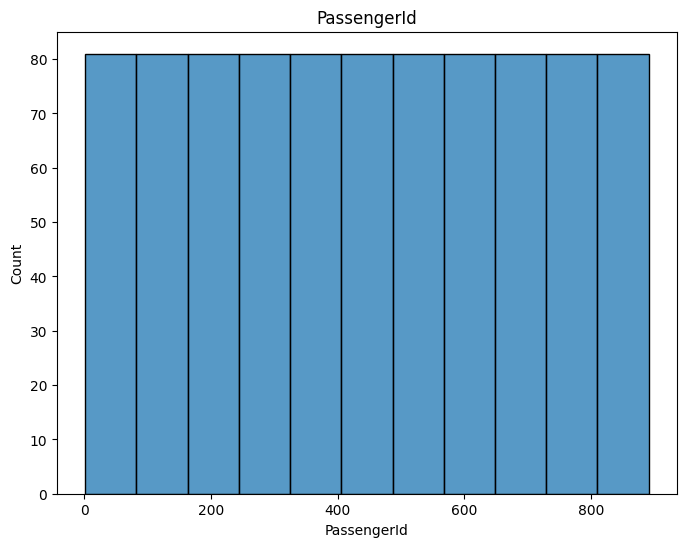

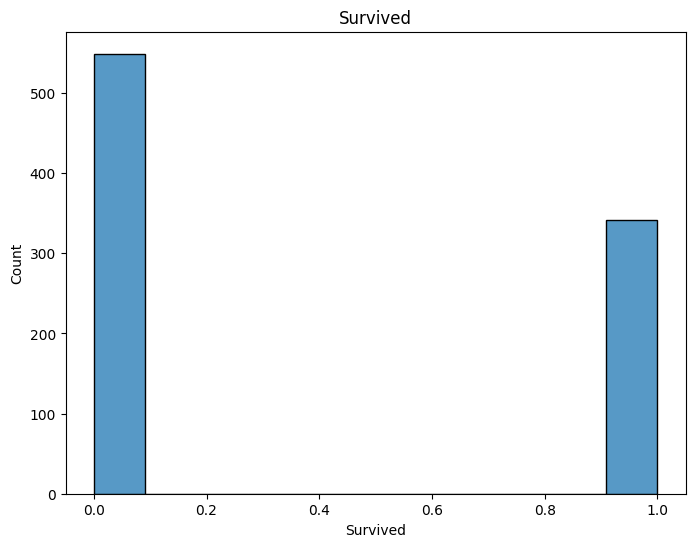

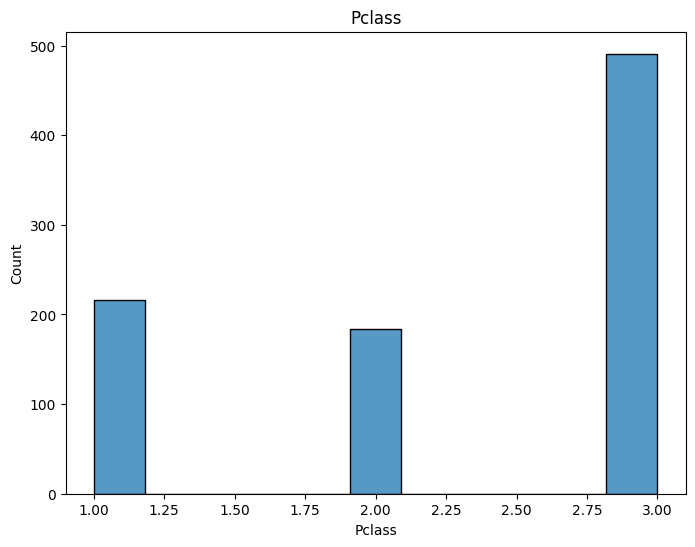

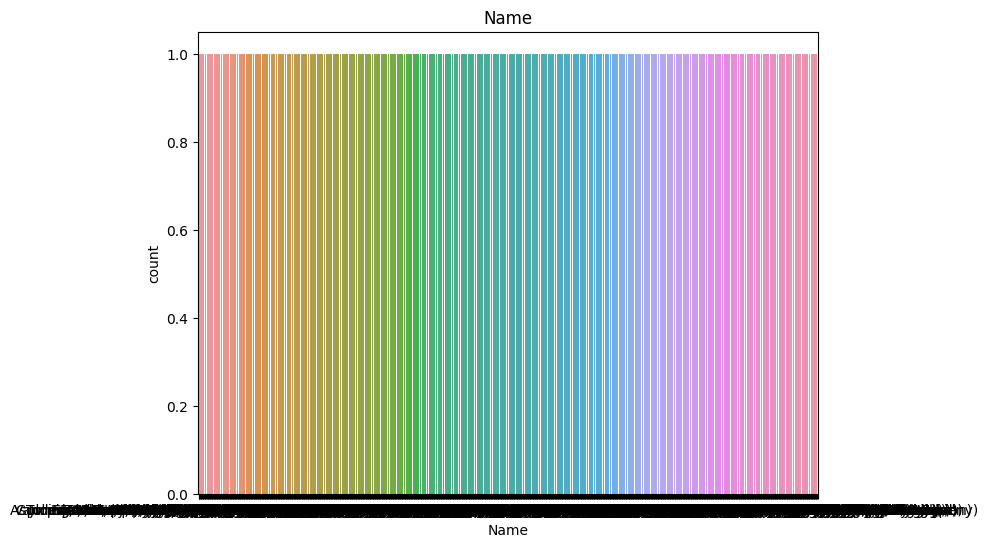

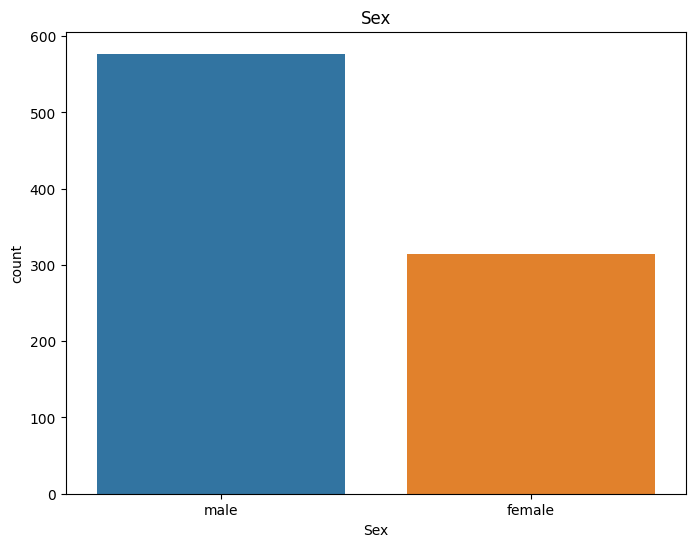

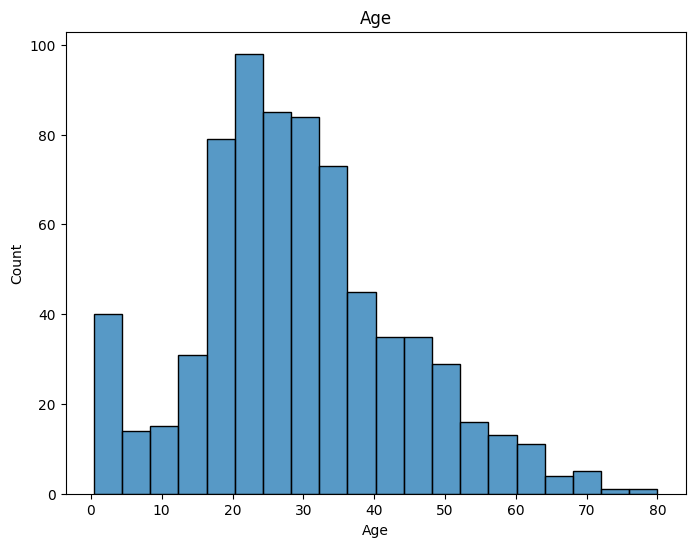

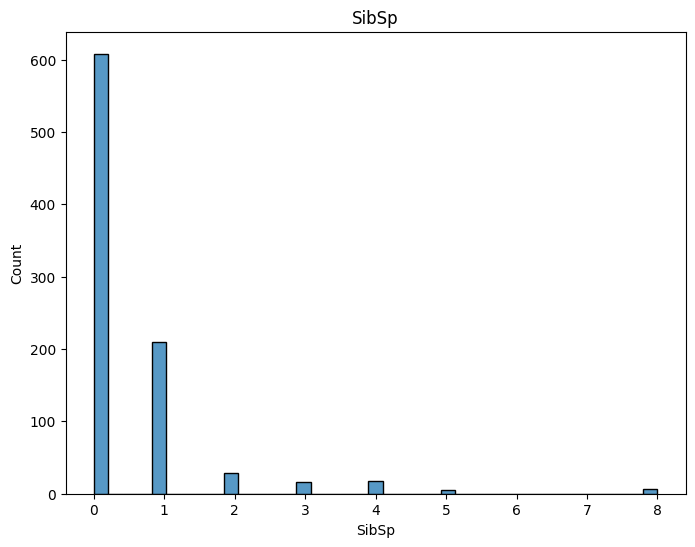

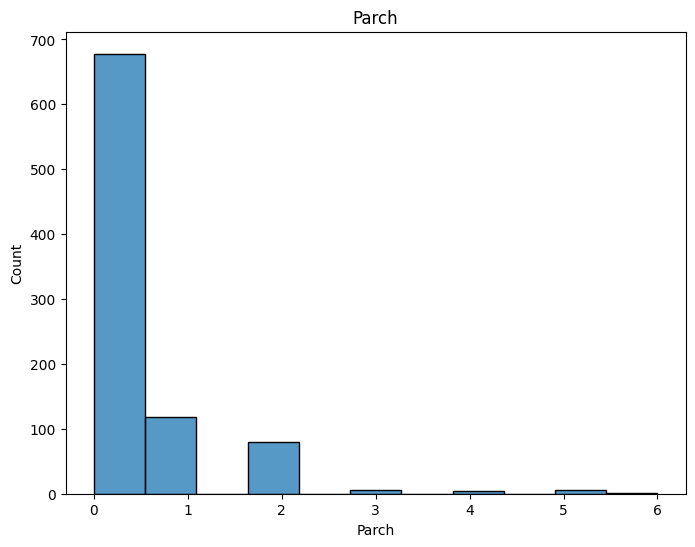

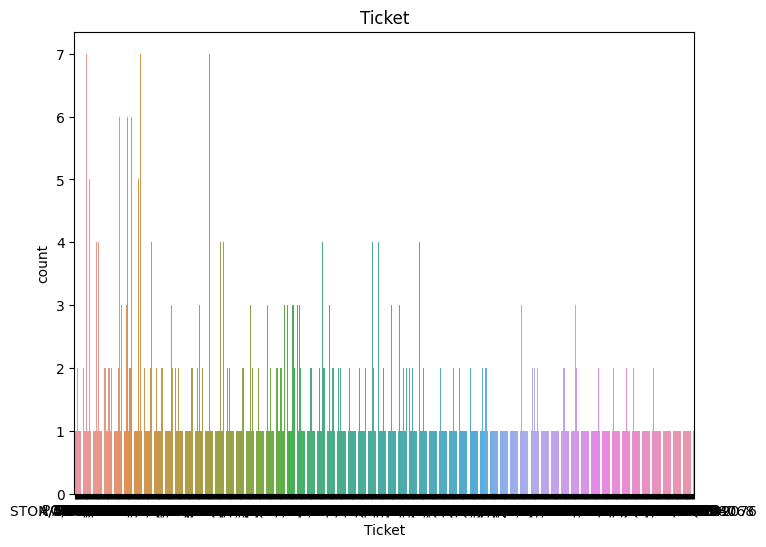

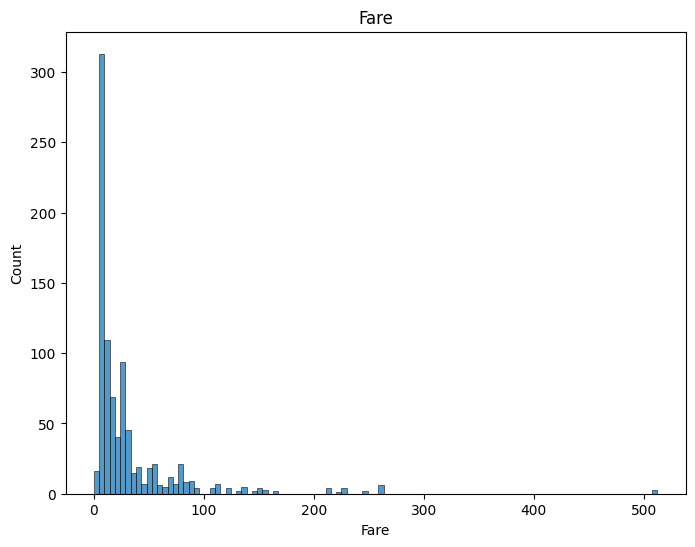

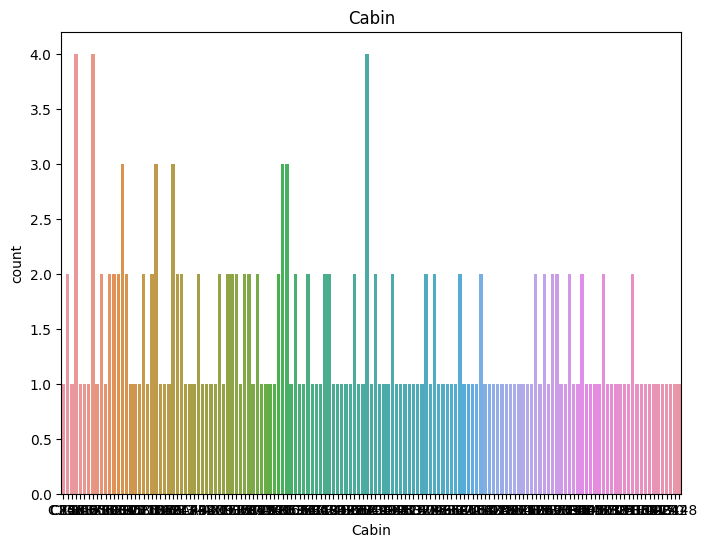

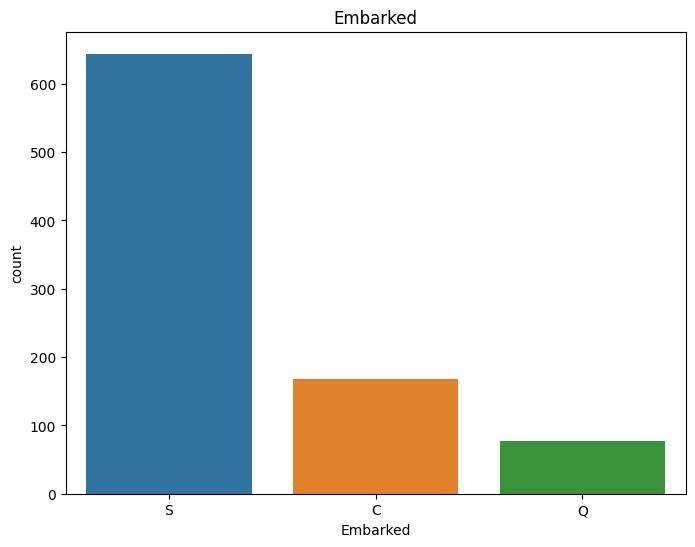

In [89]:
# Check the distribution of each feature
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(col)
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.histplot(x=col, data=df)
        plt.title(col)
        plt.show()

In [90]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Preprocessing

Predicting the missing age values

In [91]:

from sklearn.ensemble import RandomForestRegressor

def finding_age(df):
    # Split the dataset into a training set and a test set
    train = df[df['Age'].notnull()]
    test = df[df['Age'].isnull()]

    # Define the features and target variable
    numeric_features = ['Pclass', 'SibSp', 'Parch', 'Fare']
    categorical_features = ['Sex', 'Embarked']
    target = 'Age'

    # One-hot encode the categorical features
    train_encoded = pd.get_dummies(train, columns=categorical_features)
    test_encoded = pd.get_dummies(test, columns=categorical_features)

    #features after encoding
    encoded_features=['Sex_female', 'Sex_male', 'Embarked_C',
        'Embarked_Q', 'Embarked_S']


    train_features= pd.concat([train[numeric_features],train_encoded[encoded_features]], axis=1)
    test_features=pd.concat([test[numeric_features],test_encoded[encoded_features]],axis=1)


    # Fit a Random Forest Regressor model on the training set
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(train_features, train[target])

    # Predict the missing age values using the trained model
    predicted_ages = rf.predict(test_features)

    return predicted_ages

df.loc[df['Age'].isnull(), 'Age'] = finding_age(df)




In [92]:
# Check for missing values in Age column
df.Age.isnull().sum()

0

Adding Has_Cabin feature to check weather the person has a cabin or not

In [93]:
# create a copy of df as df1
df1 = df.copy()

# add a new feature for cabin
df1['Has_Cabin'] = df1['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# drop the cabin column
df1.drop(['Cabin'], axis=1, inplace=True)

df1.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


Filling the 2 missing values of embarked column with the most common value

In [94]:
df1['Embarked'].fillna('S', inplace=True)
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

In [95]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Has_Cabin'],
      dtype='object')

One hot encoding for the categorical columns

In [96]:
df1 = pd.get_dummies(df1, columns=['Sex', 'Embarked'])
df1.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Has_Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

##  Feature Engineering

In [97]:
# Create a copy of df1 as df2
df2 = df1.copy()

# Extract the title from the name column
df2['Title'] = df2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles into 'Other' category
df2['Title'] = df2['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major','Mme','Ms','Mlle','Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

# Create a new feature FamilySize by adding SibSp and Parch, plus 1 for the passenger
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1

# Create a new feature IsAlone indicating whether a passenger is traveling alone or not
df2['IsAlone'] = 0
df2.loc[df2['FamilySize'] == 1, 'IsAlone'] = 1

# Create age groups
df2['AgeGroup'] = pd.cut(df2['Age'], bins=[0, 12, 18, 30, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly'])

# create fare groups
df2['FareGroup'] = pd.cut(df2['Fare'], bins=[-1, 10, 20, 30, 1000], labels=[1, 2, 3, 4])

# Drop unnecessary columns
df2 = df2.drop([  'Name', 'SibSp', 'Parch', 'Ticket','Age','Fare'], axis=1)

df2.head(5)


,PassengerId,Survived,Pclass,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone,AgeGroup,FareGroup
0,1,0,3,0,False,True,False,False,True,Mr,2,0,Young Adult,1
1,2,1,1,1,True,False,True,False,False,Mrs,2,0,Adult,4
2,3,1,3,0,True,False,False,False,True,Miss,1,1,Young Adult,1
3,4,1,1,1,True,False,False,False,True,Mrs,2,0,Adult,4
4,5,0,3,0,False,True,False,False,True,Mr,1,1,Adult,1


One hot encoding for the Title,AgeGroup and FareGroup

In [98]:
df2 = pd.get_dummies(df2, columns=['Title','AgeGroup', 'FareGroup'])
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Has_Cabin', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize',
       'IsAlone', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'AgeGroup_Child', 'AgeGroup_Teenager',
       'AgeGroup_Young Adult', 'AgeGroup_Adult', 'AgeGroup_Elderly',
       'FareGroup_1', 'FareGroup_2', 'FareGroup_3', 'FareGroup_4'],
      dtype='object')

## preprocessing the test dataset

In [99]:
# load test data
test_df = pd.read_csv('test.csv')

# check the missing values in each column
test_df.isnull().sum()


# fill missing fare value with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# fill missing age values with the median age
# test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df.loc[test_df['Age'].isnull(), 'Age'] = finding_age(test_df)

# create a new feature Has_Cabin indicating whether a passenger has a cabin or not
test_df['Has_Cabin'] = test_df['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

# create a new feature FamilySize by adding SibSp and Parch features
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# create a new feature IsAlone indicating whether a passenger is traveling alone or not
test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

# create age groups
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 30, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly'])


# create fare groups
test_df['FareGroup'] = pd.cut(test_df['Fare'], bins=[-1, 10, 20, 30, 1000], labels=[1, 2, 3, 4])

# extract the title from the name column
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# group rare titles into 'Other' category
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major','Mme','Ms','Mlle', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

# perform one-hot encoding on categorical columns
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title'])

# drop unnecessary columns
test_df.drop([ 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)

# check the processed test data
test_df.head()




,PassengerId,Pclass,Has_Cabin,FamilySize,IsAlone,AgeGroup,FareGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,3,0,1,1,Adult,1,False,True,False,True,False,False,False,True,False,False
1,893,3,0,2,0,Adult,1,True,False,False,False,True,False,False,False,True,False
2,894,2,0,1,1,Elderly,1,False,True,False,True,False,False,False,True,False,False
3,895,3,0,1,1,Young Adult,1,False,True,False,False,True,False,False,True,False,False
4,896,3,0,3,0,Young Adult,2,True,False,False,False,True,False,False,False,True,False


In [100]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Has_Cabin       0
FamilySize      0
IsAlone         0
AgeGroup        0
FareGroup       0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Other     0
dtype: int64

In [101]:
test_df.dtypes


PassengerId        int64
Pclass             int64
Has_Cabin          int64
FamilySize         int64
IsAlone            int64
AgeGroup        category
FareGroup       category
Sex_female          bool
Sex_male            bool
Embarked_C          bool
Embarked_Q          bool
Embarked_S          bool
Title_Master        bool
Title_Miss          bool
Title_Mr            bool
Title_Mrs           bool
Title_Other         bool
dtype: object

In [102]:
test_df = pd.get_dummies(test_df, columns=['AgeGroup', 'FareGroup'])
test_df.columns


Index(['PassengerId', 'Pclass', 'Has_Cabin', 'FamilySize', 'IsAlone',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'AgeGroup_Child', 'AgeGroup_Teenager', 'AgeGroup_Young Adult',
       'AgeGroup_Adult', 'AgeGroup_Elderly', 'FareGroup_1', 'FareGroup_2',
       'FareGroup_3', 'FareGroup_4'],
      dtype='object')

## Model Building


defining x_train and y_train

In [103]:
X_train=df2.drop([ 'PassengerId','Survived'], axis=1)
y_train=df2['Survived']

Using Grid Search Cv to find the best model

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


# define the models and their hyperparameters to tune
models = [
    {
        'name': 'Random Forest',
        'estimator': RandomForestClassifier(),
        'hyperparameters': {
            'n_estimators': [50, 100, 150],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    {
        'name': 'Gradient Boosting',
        'estimator': GradientBoostingClassifier(),
        'hyperparameters': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    {
        'name': 'SVM',
        'estimator': SVC(probability=True),
        'hyperparameters': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'degree': [2, 3, 4],
            'gamma': ['scale', 'auto']
        }
    },
    {
        'name': 'XGBoost',
        'estimator': XGBClassifier(),
        'hyperparameters': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.1, 0.01, 0.001],
            'subsample': [0.5, 0.8, 1],
            'colsample_bytree': [0.5, 0.8, 1],
            'gamma': [0, 1, 5]
        }
    }
]

# loop through each model and perform grid search
for model in models:
    print(f"Training {model['name']}...")
    grid = GridSearchCV(
        estimator=model['estimator'],
        param_grid=model['hyperparameters'],
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )

    grid.fit(X_train,y_train)
    print(f"Best parameters for {model['name']}: {grid.best_params_}")
    print(f"Best score for {model['name']}: {grid.best_score_}")
    print("\n")



Training Random Forest...
Best parameters for Random Forest: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best score for Random Forest: 0.8350009415604795


Training Gradient Boosting...
Best parameters for Gradient Boosting: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best score for Gradient Boosting: 0.8316364321134895


Training SVM...
Best parameters for SVM: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVM: 0.8361182599962339


Training XGBoost...
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Best score for XGBoost: 0.8327474734793798




Saving the best Model to a pickle file


In [105]:
import pickle

# Assuming you have the best model and its hyperparameters stored in `svm_best` variable
best_model = grid.best_estimator_
best_hyperparameters = grid.best_params_
# print(best_model)
# print(best_hyperparameters)

# Save the best model and hyperparameters to a pickle file
with open('best_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)


 evaluate model performance based on other relevant metrics and contextual factors

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# define a function to evaluate model performance
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_prob)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1-score: {:.4f}".format(f1))
    print("AUC: {:.4f}".format(auc))
    print("Specificity: {:.4f}".format(specificity))


In [107]:
import pickle

# Load the saved model and hyperparameters from the pickle file
with open('best_model.pickle', 'rb') as f:
    best_model = pickle.load(f)

evaluate_model(best_model, X_train, y_train)

Accuracy: 0.8373
Precision: 0.8127
Recall: 0.7485
F1-score: 0.7793
AUC: 0.8857
Specificity: 0.8925


### Predicting on the test data 

In [108]:
# make sure the columns in test_df are in the same order as in df2
test_df = test_df.reindex(columns=df2.columns.drop('Survived'))

# Make predictions on the test dataset
X_test = test_df.drop('PassengerId', axis=1)
test_df['Survived'] = best_model.predict(X_test)

# Create a CSV file containing passenger IDs and survival predictions
test_df[['PassengerId', 'Survived']].to_csv('predictions.csv', index=False)
